In [1]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [2]:
# download sample twiter dataset
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/nguyennam/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [3]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings("positive_tweets.json")
all_negative_tweets = twitter_samples.strings("negative_tweets.json")

In [6]:
print(f"Number of positive tweets: {len(all_positive_tweets)}")
print(f"Number of negative tweets: {len(all_negative_tweets)}")

print(f"\nThe type of all positive tweets is: {type(all_positive_tweets)}")
print(f"The type of a tweet entry if: {type(all_negative_tweets[0])}")

print(all_negative_tweets[0])

Number of positive tweets: 5000
Number of negative tweets: 5000

The type of all positive tweets is: <class 'list'>
The type of a tweet entry if: <class 'str'>
hopeless for tmr :(


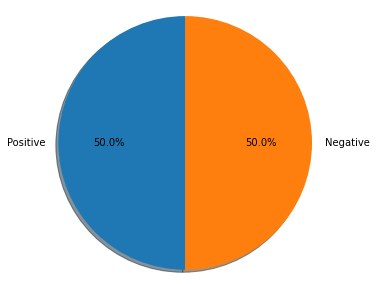

In [7]:
# visualize data

# declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = "Positive", "Negative"

# Size for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)]

# visualize by pie chart
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

plt.axis("equal")

plt.show()

### Preprocessing raw text for Sentiment Analysis

* Tokenizing the string
* Lowercasing
* Removing stop word and punctuation
* Stemming

In [9]:
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [10]:
# download stopwords from nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nguyennam/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [13]:
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [16]:
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
tweet2 = re.sub(r'#', '', tweet2)

tweet2

'My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… '

In [18]:
# tokenize the string using nltk

tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

tweet_tokens = tokenizer.tokenize(tweet2)

print(f"Tokenized string {tweet_tokens}")
print(f"len tokenized string {len(tweet_tokens)}")

Tokenized string ['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']
len tokenized string 16


In [20]:
# remove stop word and punctuations
stopwords_english = stopwords.words('english')

print(f"Stop words: \n{stopwords_english}")

print(f"\nPunctuations: \n{string.punctuation}")

Stop words: 
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [21]:
tweets_clean = []

for word in tweet_tokens: 
    if (word not in stopwords_english) and (word not in string.punctuation):
        tweets_clean.append(word)


print(f"Tweets clean: {tweets_clean}")

Tweets clean: ['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [22]:
# stemming
stemmer = PorterStemmer()

tweets_stem = []

for word in tweets_clean: 
    stem_word = stemmer.stem(word)
    tweets_stem.append(stem_word)

print("Stemmed words: ")
print(tweets_stem)

Stemmed words: 
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [23]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean